# Midterm exam 1 - solution key

1. 40 (solved in the bottom)
2. 5 (solved in the bottom)
3. 2 (solved in the bottom)

In [1]:
import pandas as pd
from itertools import chain #for unlisting nested lists

#scraping
import time
import requests
from pprint import pprint
from bs4 import BeautifulSoup

#nltk
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
#nltk.download('popular', halt_on_error=False)

#textblob
from textblob import TextBlob, Word

In [2]:
def my_scraper(url):
    response = requests.get(url)
    page = response.content
    page = BeautifulSoup(page,"html.parser")
    
    titles = page.find_all("div",class_="job-inner job-item-title")
    job = [i.find("h4").get_text() for i in titles]
    org = [i.find("p").get_text() for i in titles]

    return job,org

In [3]:
url_base = "https://staff.am/en/jobs?page="
all_jobs = []
all_orgs = []

for i in range(1,11):
    url = url_base + str(i)
    job,org= my_scraper(url)
    all_jobs.append(job)
    all_orgs.append(org)

    time.sleep(3)

In [4]:
job_list = list(chain.from_iterable(all_jobs))
org_list = list(chain.from_iterable(all_orgs))

for i,j in enumerate(org_list):
    last_el = j.split(" ")[-1]
    if len(last_el)<=4:
        org_list[i] = org_list[i].replace(last_el,"")

job_string = " ".join(job_list)
job_string = job_string.lower()

job_string = job_string.replace("senior","")
job_blob = TextBlob(job_string)

In [5]:
freq = nltk.FreqDist(job_blob.words)
freq.plot(5, cumulative=False)

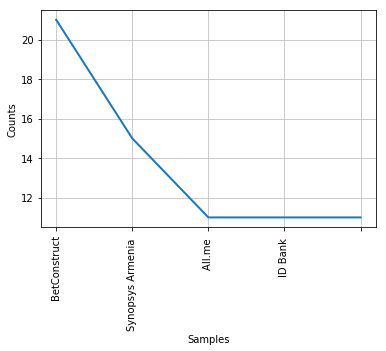

In [6]:
freq = nltk.FreqDist(org_list)
freq.plot(5, cumulative=False)

In [7]:
print("MC 1")
print(len(all_jobs[0]))

print("MC 2")
print(list(chain.from_iterable(all_orgs[:3])).count("Webb Fontaine Holding LLC"))

print("MC 2")
jobs_df = list(chain.from_iterable(all_jobs))
orgs_df = list(chain.from_iterable(all_orgs))
df = pd.DataFrame(jobs_df,orgs_df)
print(" ".join(list(df[df.index=="Webb Fontaine Holding LLC"][0])).count("Developer"))

MC 1
40
MC 2
5
MC 2
2
